In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle

#Set directory
current_directory_path = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Four_Class_Model/"
os.chdir(current_directory_path)

# ML Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Load Preprocessed Data

In [2]:
# Set path to the data and models
dataset_dir = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Four_Class_Model/"

# Iterate through files in the folder
for file_name in os.listdir(dataset_dir):
    # Check if the file has .pkl extension
    if file_name.endswith('.pkl'):
        # Load the pickle file
        file_path = os.path.join(dataset_dir, file_name)
        with open(file_path, 'rb') as file:
            images, labels = pickle.load(file)
            
        # Convert to numpy arrays
        images, labels = np.array(images), np.array(labels)
        
        # Assign loaded data to variables with modified names
        # Remove .pkl extension from the file name
        variable_name = os.path.splitext(file_name)[0]
        # Assign loaded data to variables with modified names
        globals()[f"{variable_name}_images"] = images
        globals()[f"{variable_name}_labels"] = labels

        # Optionally, you can print the loaded data for verification
        print(f"Loaded {variable_name}_images with length {images.shape}")
        print(f"Loaded {variable_name}_labels with length {len(labels)}")

Loaded four_class_test_images with length (425, 256, 256)
Loaded four_class_test_labels with length 425
Loaded four_class_train_images with length (3360, 256, 256)
Loaded four_class_train_labels with length 3360
Loaded four_class_val_images with length (420, 256, 256)
Loaded four_class_val_labels with length 420


# Four-Class Model

In [3]:
num_classes = 4
img_height = 256
img_width = 256
input_shape = (256, 256, 1)

In [4]:
FC_model = Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(6, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])

In [5]:
FC_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [6]:
FC_history = FC_model.fit(four_class_train_images, four_class_train_labels,
                          epochs=10,
                          batch_size=32,
                          validation_data=(four_class_val_images, four_class_val_labels))

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.5219 - loss: 170.4460 - val_accuracy: 0.7405 - val_loss: 0.7604
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.8087 - loss: 0.4473 - val_accuracy: 0.7571 - val_loss: 0.6149
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8741 - loss: 0.2978 - val_accuracy: 0.7548 - val_loss: 0.7330
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.8940 - loss: 0.2514 - val_accuracy: 0.7667 - val_loss: 0.6622
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9070 - loss: 0.2114 - val_accuracy: 0.7643 - val_loss: 0.6637
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9212 - loss: 0.1887 - val_accuracy: 0.7452 - val_loss: 0.7477
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9234 - loss: 0.1847 - val_accuracy: 0.7476 - val_loss: 0.7471
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9308 - loss: 0.1641 - val_a

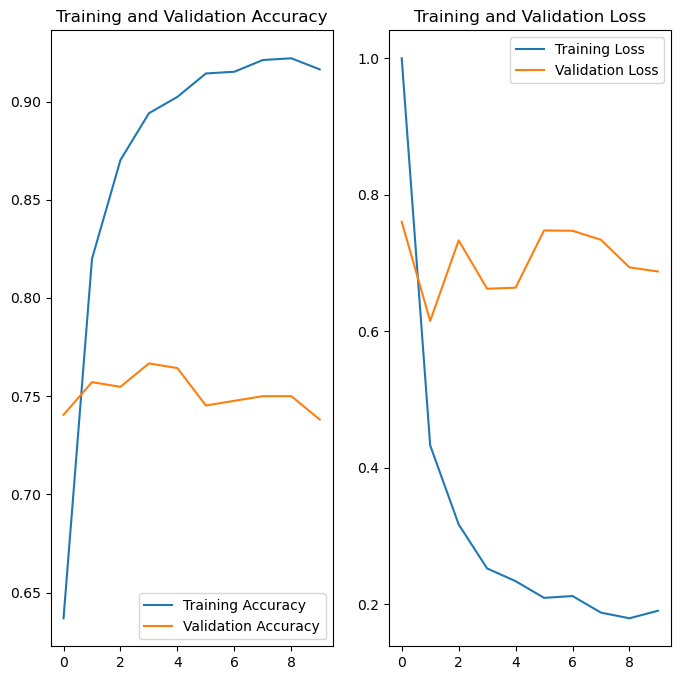

In [15]:
epochs = 10
acc = FC_history.history['accuracy']
val_acc = FC_history.history['val_accuracy']

loss = [min([x, 1]) for x in FC_history.history['loss']]
val_loss = [min([x, 1]) for x in FC_history.history['val_loss']]

#loss = [min([x, 1]) for x in loss]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
test_loss, test_accuracy = FC_model.evaluate(four_class_test_images, four_class_test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8470 - loss: 0.4553
Test Loss: 0.8103803396224976
Test Accuracy: 0.722352921962738


In [9]:
#FC_model.summary()

# Save the model and training history

In [17]:
# Specify the file path where you want to save the model
model_save_path = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Four_Class_Model/FC_model.keras"

# Save the trained model to the specified file path
FC_model.save(model_save_path)

print("Model saved successfully at:", model_save_path)

Model saved successfully at: C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Four_Class_Model/FC_model.keras
